In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()

In [171]:
train_a = pd.read_parquet('../../A/train_targets.parquet')
train_b = pd.read_parquet('../../B/train_targets.parquet')
train_c = pd.read_parquet('../../C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('../../A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../../B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../../C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('../../A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../../B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../../C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('../../A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../../B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../../C/X_test_estimated.parquet')

In [172]:
# set time as index
train_a.set_index('time', inplace=True)
train_b.set_index('time', inplace=True)
train_c.set_index('time', inplace=True)

train_b.head()

,pv_measurement
time,
2018-12-31 23:00:00,0.0
2019-01-01 00:00:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 02:00:00,0.0
2019-01-01 03:00:00,0.0


In [173]:
def min_max_scaling(df, column_name='pv_measurement'):
    scaler = MinMaxScaler()
    df[column_name] = scaler.fit_transform(df[[column_name]])
    return df

train_a = min_max_scaling(train_a)
train_b = min_max_scaling(train_b)
train_c = min_max_scaling(train_c)

In [174]:
def replace_constant_intervals_with_nan(df):
    repeated_temp = []
    intervals = []

    first = True
    for index, (idx, row) in enumerate(df.iterrows()):
        if index == 0:
            continue
        if row['pv_measurement'] == df.iloc[index - 1]['pv_measurement']:
            repeated_temp.append(idx)
            if first: 
                repeated_temp.insert(0, df.index[index - 1])
                first = False
        else:
            if len(repeated_temp) > 1:
                intervals.append((repeated_temp[0], repeated_temp[-1]))
            repeated_temp = []
            first = True

    for start, end in intervals:
        df.loc[start:end, 'pv_measurement'] = np.nan

    return df

train_a = replace_constant_intervals_with_nan(train_a)
train_b = replace_constant_intervals_with_nan(train_b)
train_c = replace_constant_intervals_with_nan(train_c)

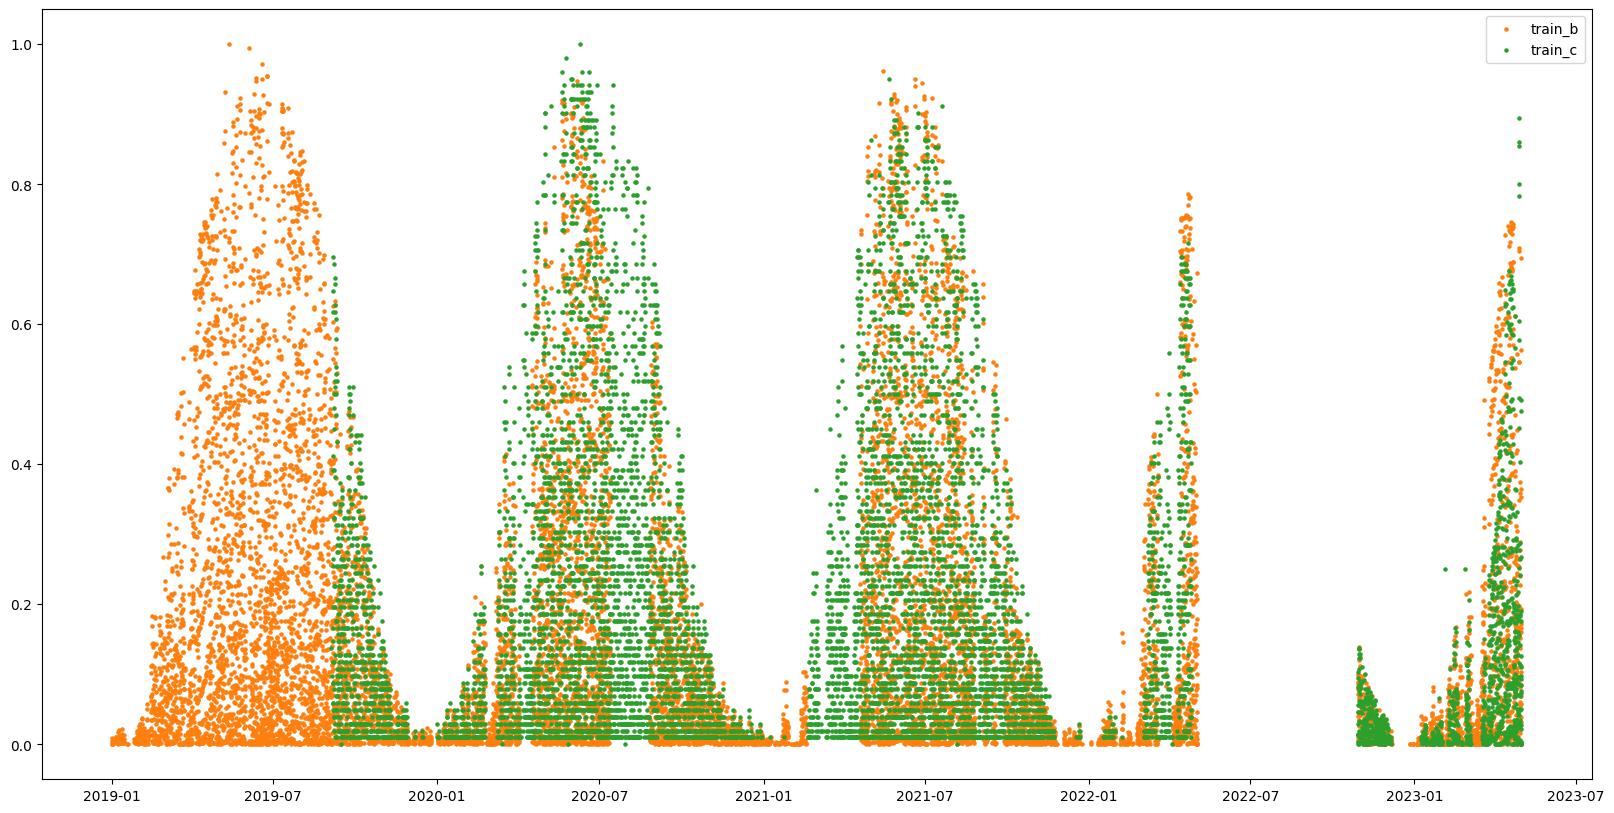

In [175]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.scatter(x=train_a.index, y=train_a['pv_measurement'], s=5, label='train_a', color = color_pal[0])
ax.scatter(x=train_b.index, y=train_b['pv_measurement'], s=5, label='train_b', color = color_pal[1])
ax.scatter(x=train_c.index, y=train_c['pv_measurement'], s=5, label='train_c', color = color_pal[2])

ax.legend()
plt.show()

In [176]:
train_b.loc['2022-07-01 12:00:00']

KeyError: '2022-07-01 12:00:00'

In [147]:
def fill_nans_with_train_a(df):
    df['pv_measurement'] = df['pv_measurement'].combine_first(train_a['pv_measurement'])
    return df

train_b = fill_nans_with_train_a(train_b)
train_c = fill_nans_with_train_a(train_c)

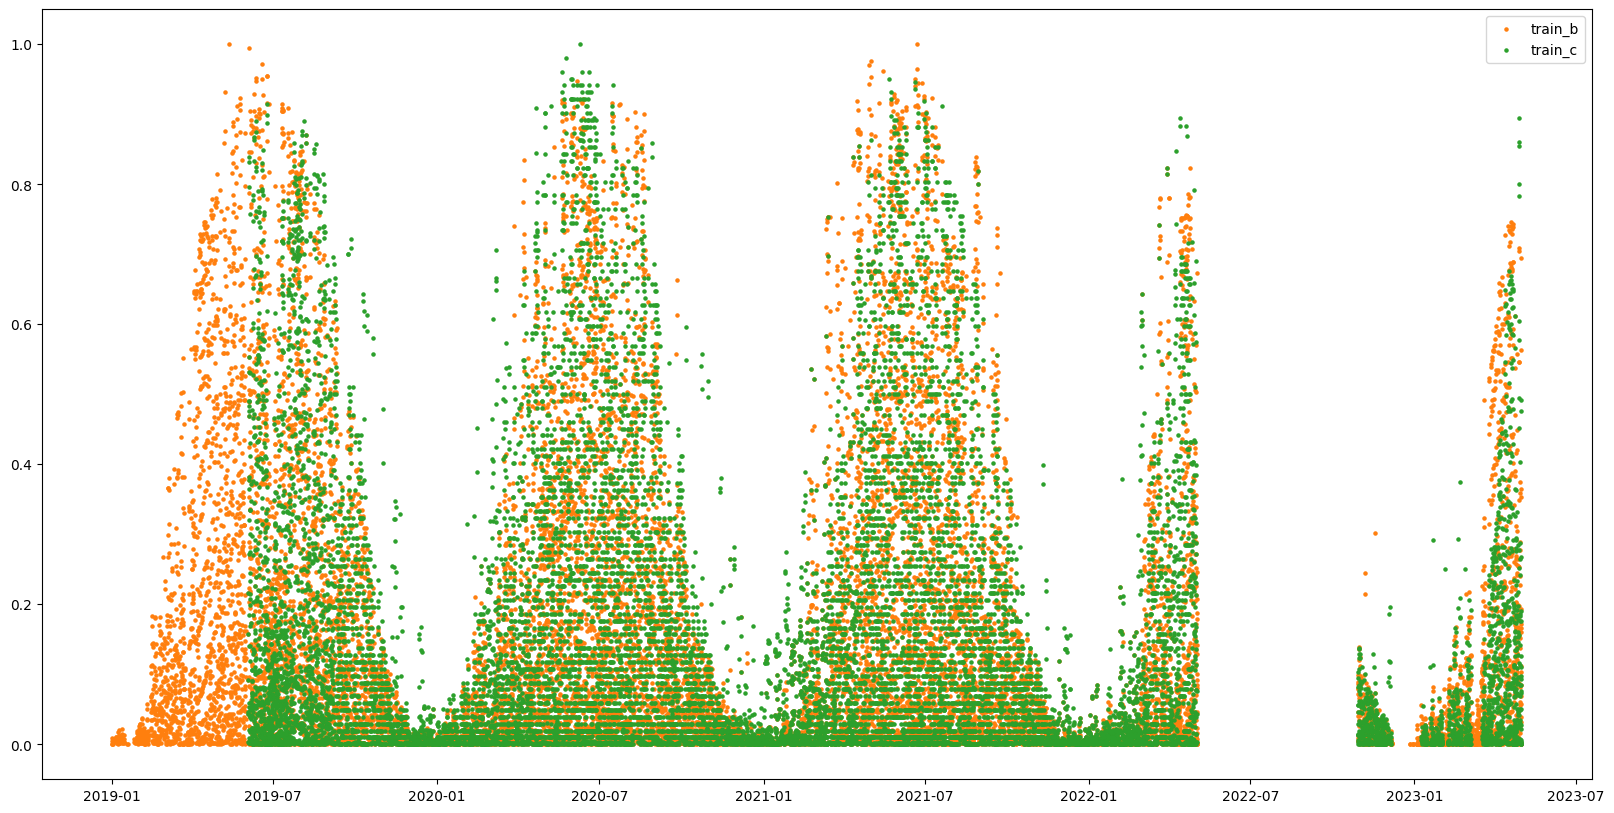

In [150]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.scatter(x=train_a.index, y=train_a['pv_measurement'], s=5, label='train_a', color = color_pal[0])
ax.scatter(x=train_b.index, y=train_b['pv_measurement'], s=5, label='train_b', color = color_pal[1])
ax.scatter(x=train_c.index, y=train_c['pv_measurement'], s=5, label='train_c', color = color_pal[2])

ax.legend()
plt.show()